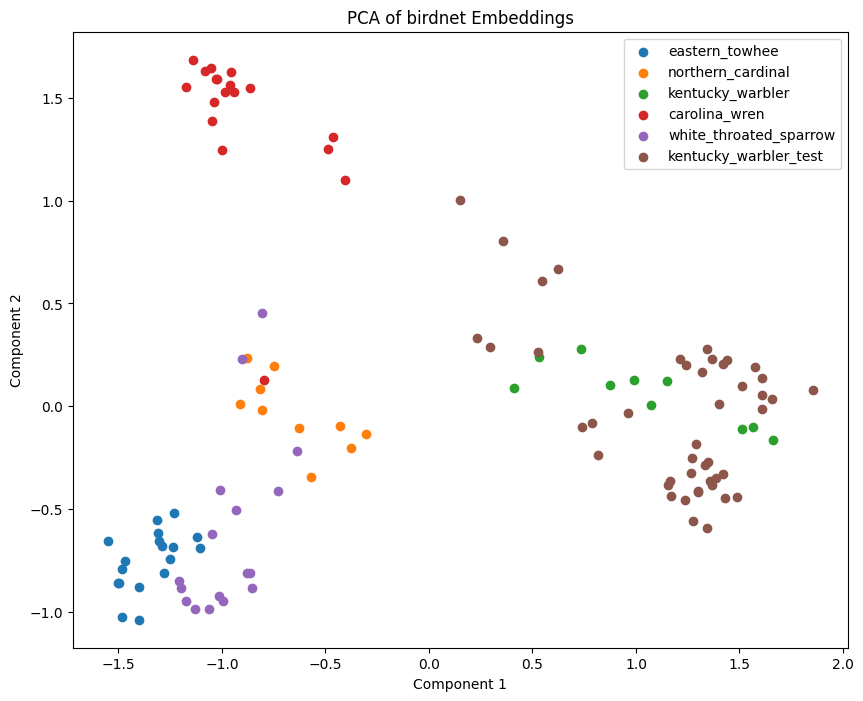

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np
import os
import matplotlib.pyplot as plt


def load_embeddings_labels(embeddings_file,labels_file):
    
    loaded = np.load(embeddings_file)
    embeddings = [loaded[key] for key in loaded]
    #embeddings = np.load(embeddings_file)
    
    labels = np.load(labels_file)
    return embeddings, labels

def plot_reduction(embeddings, labels, title, method='pca'):
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2)
    elif method == 'umap':
        reducer = umap.UMAP(n_components=2)
    else:
        raise ValueError("Method must be 'pca', 'tsne', or 'umap'")

    reduced_components = reducer.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 8))
    for label in set(labels):
        idx = np.array(labels) == label
        plt.scatter(reduced_components[idx, 0], reduced_components[idx, 1], label=label)
    
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

# load all embeddings and labels 
species = ['white_throated_sparrow','northern_cardinal',
                 'carolina_wren','eastern_towhee',
                 'kentucky_warbler','kentucky_warbler_test']

embeddings_all = []
labels_all = []
for species_idx in range(len(species)):
    processed_dir = "/home/leah_colossal_com/us_bird_data/{}/processed/".format(species[species_idx])
    labels_file = os.path.join(processed_dir,'labels.npy')
    embeddings_file = os.path.join(processed_dir,'embeddings.npz')
    
    embeddings, labels = load_embeddings_labels(embeddings_file,labels_file)
    embeddings_all += embeddings
    labels_all = np.concatenate((labels_all, labels))

plot_reduction(embeddings_all, labels_all, 'PCA of birdnet Embeddings', method='pca')

In [3]:
labels

array(['white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow', 'white_throated_sparrow',
       'white_throated_sparrow'], dtype='<U22')